In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
df = pd.read_csv('foodhub_order.csv') 

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
# Checking the shape of the dataset
df.shape ## 

(1898, 9)

In [4]:
#Checking for the various datatypes in the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
# Checking for missing values in the data
df.isnull().sum().sum()

0

In [6]:
#checking for the descriptive statistics of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [7]:
df[df['rating'] != 'Not given'].value_counts().sum()

1162

##### *Order ID*

In [8]:
df['order_id'].nunique()  

1898

##### *Customer ID*

In [9]:
df['customer_id'].nunique()

1200

##### *Restaurant Name*

In [10]:
df['restaurant_name'].nunique()

178

##### *Cuisine Type*

In [11]:
df['cuisine_type'].nunique()

14

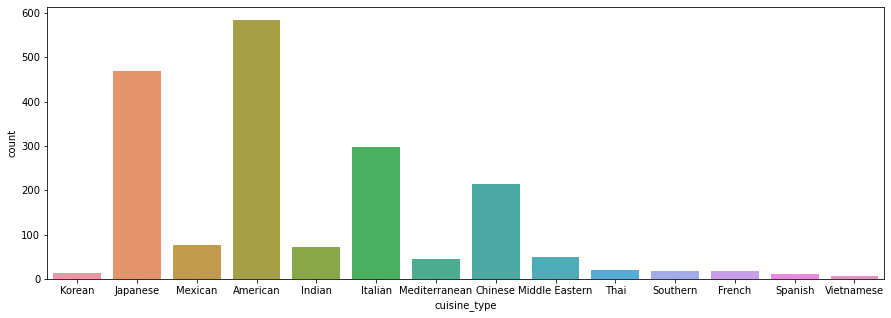

In [12]:
## Creating a countplot for cuisine type.
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') 
plt.savefig("cuisine.jpg", bbox_inches='tight')

##### *Cost of Order*

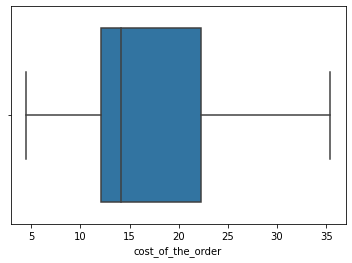

<Figure size 432x288 with 0 Axes>

In [13]:
# Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show()
plt.savefig("cost of order.jpg", bbox_inches='tight')

##### *Day of The Week*

In [14]:
 # Checking the unique values
df['day_of_the_week'].nunique() 

2

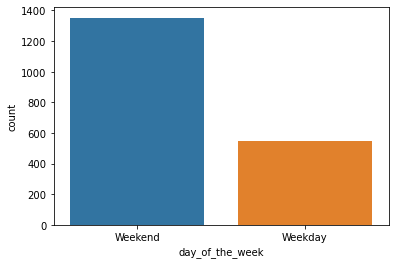

In [15]:
# bar graph for 'day_of_the_week' column
sns.countplot(data = df, x = 'day_of_the_week') 
plt.savefig("dayt.jpg", bbox_inches='tight')

##### *Rating*

In [16]:
# Checking the unique values
df['rating'].nunique() ## Complete the code to check unique values for the 'rating' column

4

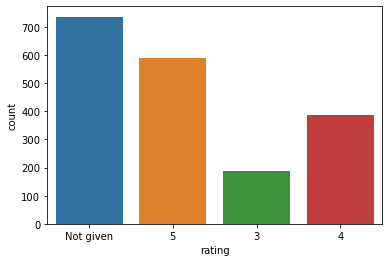

In [17]:
#bar graph for 'rating' column
sns.countplot(data = df, x = 'rating') 
plt.savefig("output.jpg", bbox_inches='tight')

##### *Food Preparation Time*

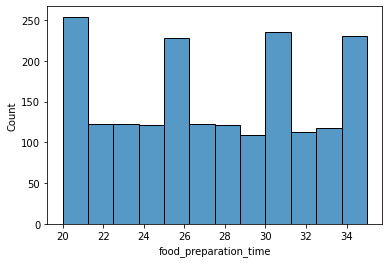

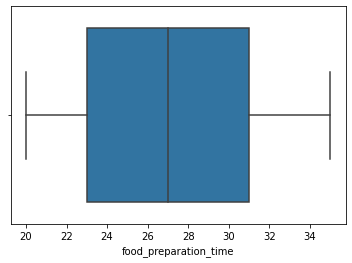

<Figure size 432x288 with 0 Axes>

In [18]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

##### *Delivery Time*

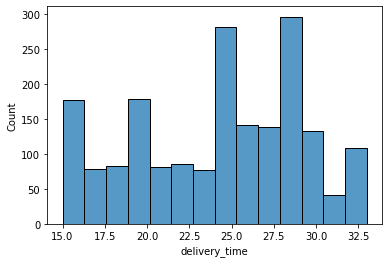

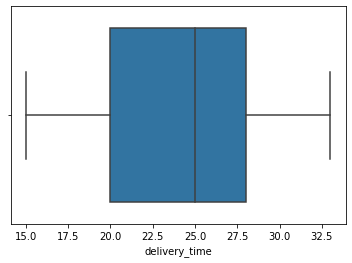

In [19]:
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

In [20]:
# Checking for the top 5 restaurants with the  highest number of orders
df['restaurant_name'].value_counts().head() 

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [21]:
# Checking for the most popular cuisines on weekends  
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head() 

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

### **Percentage of orders that cost more than $20**

In [22]:
# Getting orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

# Calculating the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculating the percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


In [23]:
# Finding the mean delivery time
mean_del_time = df['delivery_time'].mean() 

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [24]:
# Getting the counts of  each customer_id
df['customer_id'].value_counts().head(3)  

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### **Multivariate Analysis**

##### *Cuisine vs Cost of the order*

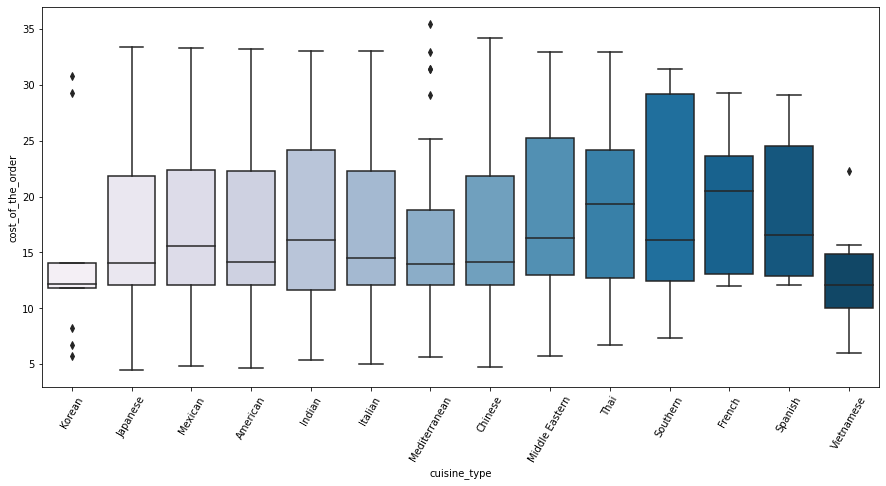

<Figure size 432x288 with 0 Axes>

In [25]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()
plt.savefig("cost by cuisine.jpg", bbox_inches='tight')

##### *Cuisine vs Food Preparation time*

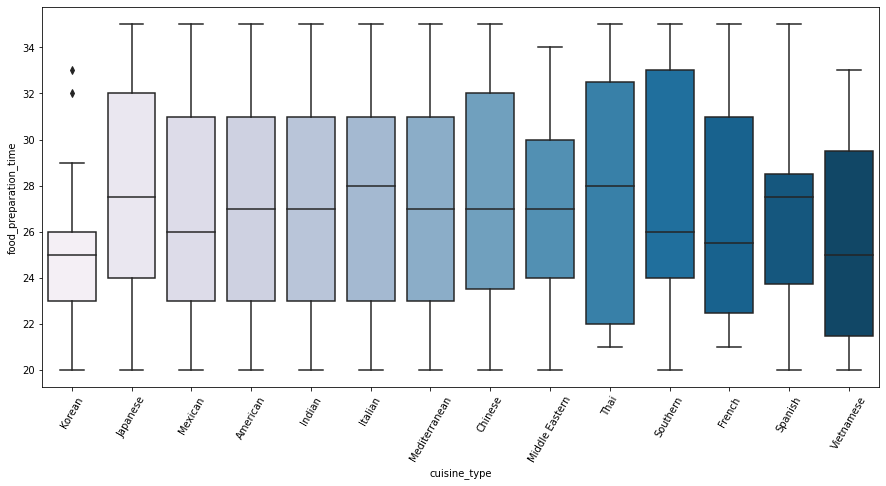

In [26]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  
plt.xticks(rotation = 60)


plt.show()

##### *Days of the week vs Delivery time*

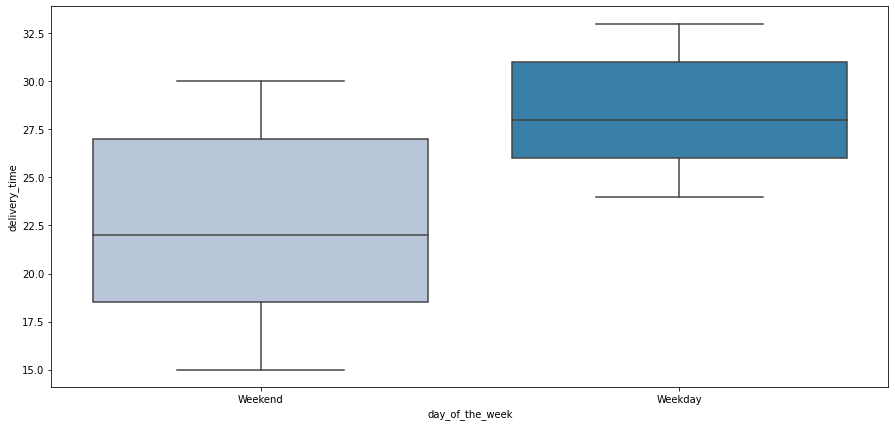

In [27]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu') 
plt.show()

##### *Rating vs Delivery time*

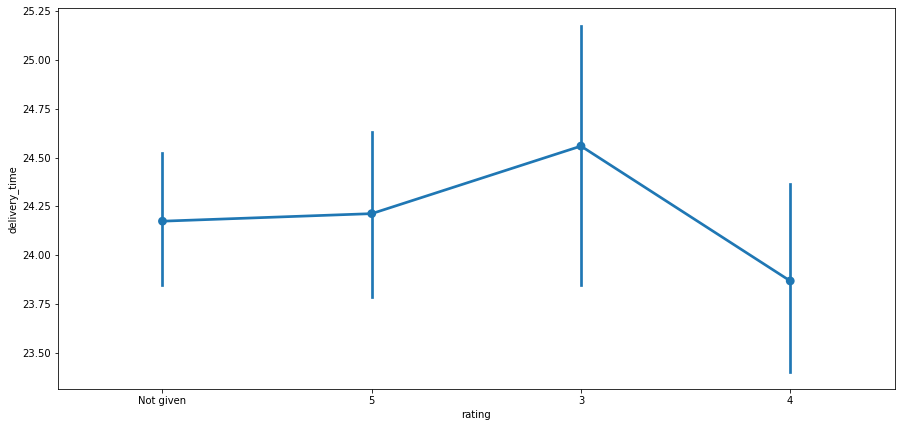

In [28]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

##### *Rating vs Food preparation time*

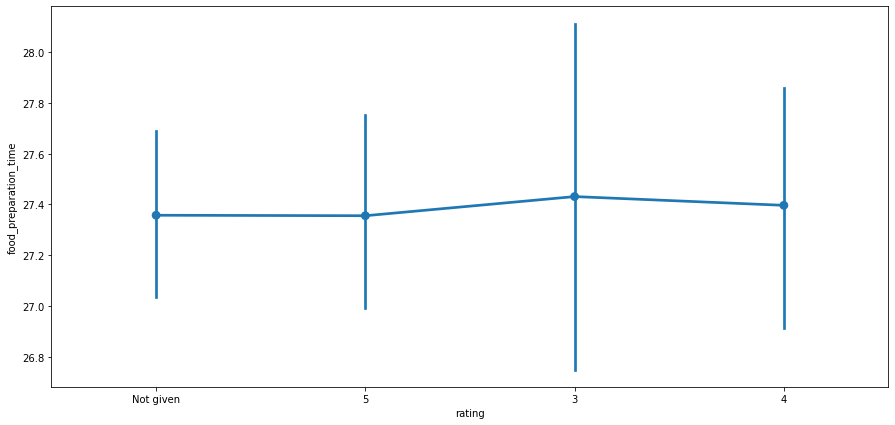

In [29]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df) 
plt.show()

##### *Rating vs Cost of order*

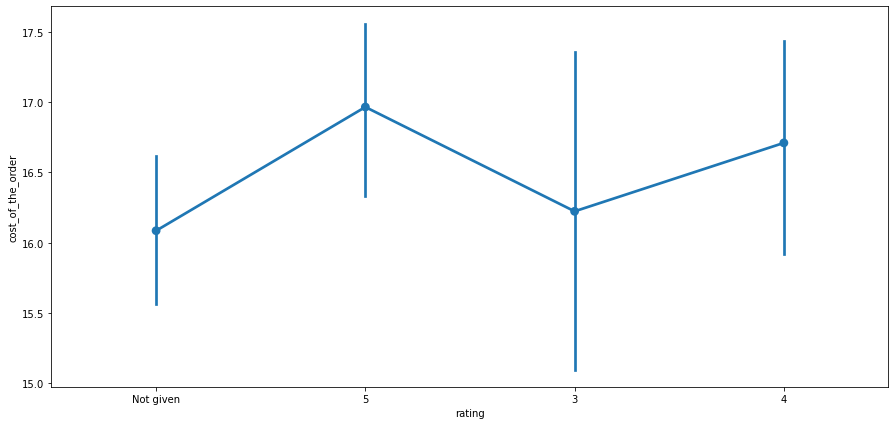

In [30]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)  
plt.show()

##### *Correlation among Variables*

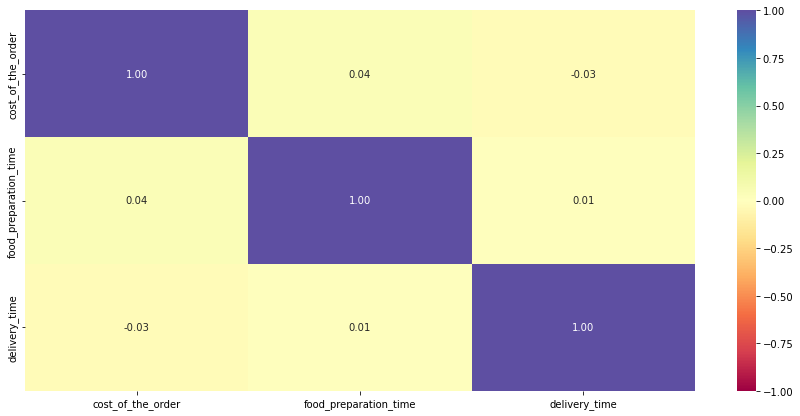

In [31]:
# Plotting the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [32]:
# Filtering the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Converting rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Creating a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [33]:
# Getting the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count["rating"]>50]['restaurant_name'] 

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Grouping the restaurant names with their ratings and finding the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [34]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [35]:
# getting the total revenue 
total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


In [36]:
# Calculating total delivery time and adding a new column to the dataframe df to store the total delivery time
df['total_time'] = (df['food_preparation_time'] + df['delivery_time'])


## finding the percentage of orders that have more than 60 minutes of total delivery time
df_over_60mins=(df[df['total_time']>60])

total_sum_of_mins=df['total_time'].value_counts().sum()

sum_of_over_60mins =df_over_60mins['total_time'].value_counts().sum()

percentage_above_60min = (sum_of_over_60mins/total_sum_of_mins)*100

print("Percentage of orders above 60 minutes of delivery time:", round(percentage_above_60min, 2), '%')

Percentage of orders above 60 minutes of delivery time: 10.54 %


In [37]:
# Finding the mean delivery time on weekdays 
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')



print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes
